#### Data Set Information:


1. The classification tasks consist in predicting the activity performed by the user from time-series generated by a Wireless Sensor Network (WSN), according to the EvAAL competition technical annex ([Web Link]).

2. In our activity recognition system we use information coming the implicit alteration of the wireless channel due to the movements of the user. The devices measure the RSS of the beacon packets they exchange among themselves in the WSN [2].

#### Attribute Information:

1. For each sequence, data is provided in comma separated value (csv) format.

2. Input data:
>Input RSS streams are provided in files named datasetID.csv, where ID is the progressive numeric sequence ID for each repetition of the activity performed.

>In each file, each row corresponds to a time step measurement (in temporal order) and contains the following information:
avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23 where avg and var are the mean and variance values over 250 ms of data, respectively.

3. Target data:
Target data is provided as the containing folder name.

4. For each activity, we have the following parameters:
 Frequency (Hz): 20
 Clock (millisecond): 250
 Total duration (seconds): 120

In [296]:
import csv
import os
#import mysql.connector as connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sklearn as sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle

In [229]:
## walking through the directory:
class task:
    def __init__(self):
        self.path='C:/Users/Manoj Negi/Downloads/AReM/'
    
    
    def walkthrough(self):
        
        """
        Comment:1 walk through into the location/directory and the path 
        """
        try:
            path=self.path
            folder_path=[]
            file_len=[]
            
            for dirpath, dirnames, filenames in os.walk(path):
                #print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")
                folder_path.append(dirpath)
                file_len.append(len(filenames))
            return file_len,folder_path
                
          
        except Exception as e:
            raise Exception("error in walkthrough",str(e))
    
    
    def allfiles(self):
        """
        Comment:2 walk through into the location/directory and checking for the files inside the directory 
        """
        try:
            tot_file,folder_path=self.walkthrough()
            n=0
            
            all_files=[]
            for i in tot_file[1:8]:
                n=n+1
                for it1 in range(1,i+1):
                    print(f"{folder_path[n]}\dataset{it1}")
                    all_files.append(f"{folder_path[n]}/dataset{it1}.csv")
            return all_files
            
        except Exception as e:
            raise Exception ("error in allflies",str(e))
            
            
    def labels(self):
        """
        Comment:2 walk through into the location/directory and checking for the files inside the directory 
        """
        try:
            folder_loc=task().walkthrough()[1]
            
            #_,folder_loc=self.walkthrough()
            dir_list = os.listdir(folder_loc[0])
            return dir_list
        
        except Exception as e:
            raise Exception ("error in folders function",str(e))    
            
    def dataset_reading_writing(self):
        try:
            all_files=self.allfiles()
            dir_list=self.labels()
            file_cont=[]  
            for m in range(len(all_files)):
                z=0
                with open(all_files[m],'r') as file:
                    data=csv.reader(file, delimiter="\n")

                    for j in data:
                        if z>=0 and z<=8:
                            if dir_list[z] in all_files[m]:
                                #print(dir_list[z])
                                file_cont.append(j[0].split(',')+[dir_list[z]])
                            else:
                                z=z+1
                    del file_cont[0:5]
                    
                #field=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','task']
                
                with open("sensordataset.txt","a+") as file:
                    writer=csv.writer(file)
                    #if all_files[m]==0:
                        #writer.writerow(field)
                        #writer.writerows(file_cont)
                    #else:
                    writer.writerows(file_cont)
                file_cont=[]       

            return print("data from all file combined.... check the file")
        except Exception as e:
            raise Exception("error in dataset_write",str(e))




In [230]:
#task().walkthrough()

In [231]:
#task().allfiles()

In [279]:
#task().labels()

In [280]:
#task().dataset_reading_writing()

C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset1
C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset2
C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset3
C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset4
C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset5
C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset6
C:/Users/Manoj Negi/Downloads/AReM/bending1\dataset7
C:/Users/Manoj Negi/Downloads/AReM/bending2\dataset1
C:/Users/Manoj Negi/Downloads/AReM/bending2\dataset2
C:/Users/Manoj Negi/Downloads/AReM/bending2\dataset3
C:/Users/Manoj Negi/Downloads/AReM/bending2\dataset4
C:/Users/Manoj Negi/Downloads/AReM/bending2\dataset5
C:/Users/Manoj Negi/Downloads/AReM/bending2\dataset6
C:/Users/Manoj Negi/Downloads/AReM/cycling\dataset1
C:/Users/Manoj Negi/Downloads/AReM/cycling\dataset2
C:/Users/Manoj Negi/Downloads/AReM/cycling\dataset3
C:/Users/Manoj Negi/Downloads/AReM/cycling\dataset4
C:/Users/Manoj Negi/Downloads/AReM/cycling\dataset5
C:/Users/Manoj Negi/Downloads/AReM/cycling\dataset6

###### Logistic regression:
###### dataset:movement sensor dataset

objective: find the probability of data auc and confusion matrix and suggest the bestter model:




In [299]:
class dataset():
    def __init__(self,filename):
        self.filename=filename
        
    
    def data(self):
        try:
            data=pd.read_csv(f"{self.filename}")
            return data
        except Exception as e:
            raise Exception("error in dataset calling",str(e))
    
    def pandasProfileReport(self):
        try:
            data=self.data()
            profile=ProfileReport(data,title="MOVEMENT SENSOR DATA PROFILE")
            return profile
        
        except Exception as e:
            raise Exception("error in  ProfileReport",str(e))    
            
            
    def remove_duplicate(self):
        """
        let's remove the duplicate data:
        """
        try:
            data=self.data()
            df=data.drop_duplicates()
            return df
        
        except Exception as e:
            raise Exception("error in remove_duplicate",str(e))    
            
    
    def index_check_for_null(self):
        """
        index_check_for_null taht how may index are have null.
        """
        try:
            data=self.remove_duplicate()
            print(f"null in index:{df.columns[df.isnull().any()]}")
            print(f"null values in column :{df.isnull().sum()}")
            return
        
        except Exception as e:
            raise Exception("error in index_check_for_null",str(e))    
            
    def data_shuffle(self):
        """
        shuffling the data to prevent the data leakage
        """
        try:
            data=self.remove_duplicate()
            new_df = shuffle(data, random_state=21)
            return new_df
        
        except Exception as e:
            raise Exception("error in data_shuffle",str(e)) 



In [300]:
dataset('sensordataset.txt').data()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      39.25       0.43      22.75       0.43      33.75   
1         250      39.25       0.43      23.00       0.00      33.00   
2         500      39.25       0.43      23.25       0.43      33.00   
3         750      39.50       0.50      23.00       0.71      33.00   
4        1000      39.50       0.50      24.00       0.00      33.00   
...       ...        ...        ...        ...        ...        ...   
41808  118750      34.50       6.18       9.00       3.56      12.67   
41809  119000      25.75       6.02      13.75       2.05      16.00   
41810  119250      31.50       3.35      10.25       5.12      16.25   
41811  119500      33.75       2.77      14.00       3.24      13.75   
41812  119750      37.00       1.41      18.25       3.70      11.00   

       var_rss23      task  
0           1.30  bending1  
1           0.00  bending1  
2           0.00  bending1  
3           0.00  bending1  
4           0.00  bending1  
...          ...       ...  
41808       4.19   walking  
41809       1.58   walking  
41810       2.95   walking  
41811       0.43   walking  
41812       4.32   walking  

[41813 rows x 8 columns]

In [301]:
#dataset("sensordataset.txt").pandasProfileReport()

###### Observation and working:

>1.we have some missing values either we can remove it completely or do avaerage.

>2.some datapoint are not distributed-handle outliners

>3.Handle missing data.

>4.Eliminate duplicates 


let's perpare the data and then check further.

In [302]:
## let's remove the duplicate data:
dataset("sensordataset.txt").remove_duplicate()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      39.25       0.43      22.75       0.43      33.75   
1         250      39.25       0.43      23.00       0.00      33.00   
2         500      39.25       0.43      23.25       0.43      33.00   
3         750      39.50       0.50      23.00       0.71      33.00   
4        1000      39.50       0.50      24.00       0.00      33.00   
...       ...        ...        ...        ...        ...        ...   
41808  118750      34.50       6.18       9.00       3.56      12.67   
41809  119000      25.75       6.02      13.75       2.05      16.00   
41810  119250      31.50       3.35      10.25       5.12      16.25   
41811  119500      33.75       2.77      14.00       3.24      13.75   
41812  119750      37.00       1.41      18.25       3.70      11.00   

       var_rss23      task  
0           1.30  bending1  
1           0.00  bending1  
2           0.00  bending1  
3           0.00  bending1  
4           0.00  bending1  
...          ...       ...  
41808       4.19   walking  
41809       1.58   walking  
41810       2.95   walking  
41811       0.43   walking  
41812       4.32   walking  

[38481 rows x 8 columns]

In [303]:
## let's check how many null we have left:
dataset("sensordataset.txt").index_check_for_null()

null in index:Index([], dtype='object')
null values in column :time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
task         0
dtype: int64


In [306]:
## shuffled data:
dataset("sensordataset.txt").data_shuffle()


time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2918    9500      44.50       0.50      15.00       0.00      21.25   
16841  31000      39.50       0.50       2.00       0.82      15.67   
38401  93000      36.00       3.00      12.00       0.00      13.50   
27951  80000      41.50       0.50      15.00       0.00      10.75   
35845  44000      34.50       3.20      21.75       1.92      17.25   
...      ...        ...        ...        ...        ...        ...   
16909  48000      39.25       0.43       0.00       0.00      13.75   
8964   87000      34.33       2.36      16.33       3.68      18.25   
5944   47500      30.00       0.00      15.00       0.00      11.25   
5327   13000      27.50       0.50       1.00       0.00      16.50   
15782   4250      39.50       0.50       8.00       0.00      11.67   

       var_rss23      task  
2918        0.43  bending1  
16841       0.94     lying  
38401       4.50   walking  
27951       0.43  standing  
35845       3.27   walking  
...          ...       ...  
16909       1.30     lying  
8964        4.71   cycling  
5944        0.83  bending2  
5327        1.12  bending2  
15782       0.47     lying  

[38481 rows x 8 columns]

In [307]:
## plotting the box plot for range checking:opps call into df
df=dataset("sensordataset.txt").data_shuffle()

###### Looks like the data is clean ,now we can detect outliners and normalize dataset.

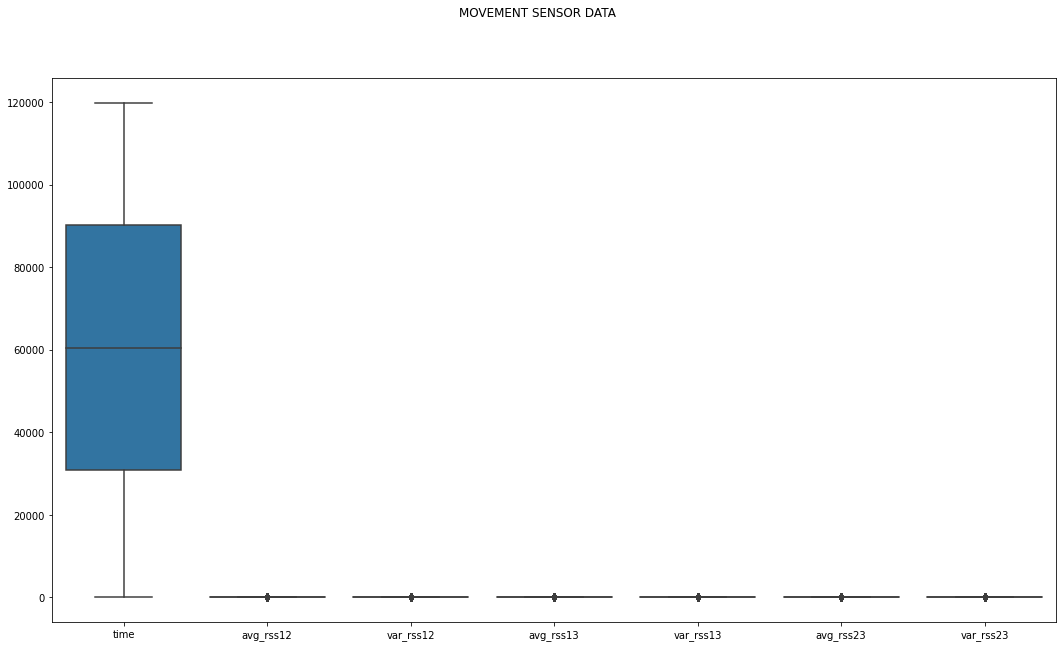

In [308]:
fig, ax = plt.subplots( figsize=(18, 10))
fig.suptitle('MOVEMENT SENSOR DATA')
sns.boxplot( data=df, ax=ax);

###### To many outliners, let's change the quartile range.


### note:
make sure while changing the quantile range not to loose too much data.

In [309]:
## handle the out liner :
q=df['avg_rss13'].quantile(0.99)
new_df=df[df['avg_rss13']<q] 


q=new_df['avg_rss23'].quantile(0.99)
new_df=new_df[new_df['avg_rss23']<q]



q=new_df['var_rss13'].quantile(.98)    
new_df=new_df[new_df['var_rss13']<q] 



q=new_df['var_rss23'].quantile(.98)    
new_df=new_df[new_df['var_rss23']<q] 



q=new_df['avg_rss12'].quantile(.01)    
new_df=new_df[new_df['avg_rss12']>q]


q=new_df['var_rss12'].quantile(.95)    
new_df=new_df[new_df['var_rss12']<q] 


In [310]:
from sklearn.utils import shuffle
new_df = shuffle(new_df, random_state=0)
new_df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
35636  109750      36.00       5.61      15.75       3.90       17.0   
16100   83750      39.67       0.47       9.00       1.87       12.0   
11082   20250      33.75       1.30      17.00       3.00       20.0   
12311   89000      38.00       2.92      16.25       0.83       18.5   
9168    18750      34.50       2.60      19.75       2.28       15.0   
...       ...        ...        ...        ...        ...        ...   
26204  117000      41.50       0.50      17.50       0.87       13.5   
30866   99250      48.00       0.00       9.50       0.50       11.5   
14232   92750      48.00       0.00       4.75       0.43        2.0   
21933  115500      45.00       0.00       9.00       0.00       19.0   
24005   41250      42.33       0.47      20.00       0.71       21.0   

       var_rss23      task  
35636       3.39   walking  
16100       0.00     lying  
11082       2.92   cycling  
12311       2.96   cycling  
9168        3.54   cycling  
...          ...       ...  
26204       1.12   sitting  
30866       0.87  standing  
14232       1.00     lying  
21933       0.82   sitting  
24005       0.00   sitting  

[33655 rows x 8 columns]

In [311]:
len(df)

38481

In [312]:
len(new_df)

33655

In [313]:
len(df)-len(new_df)

4826

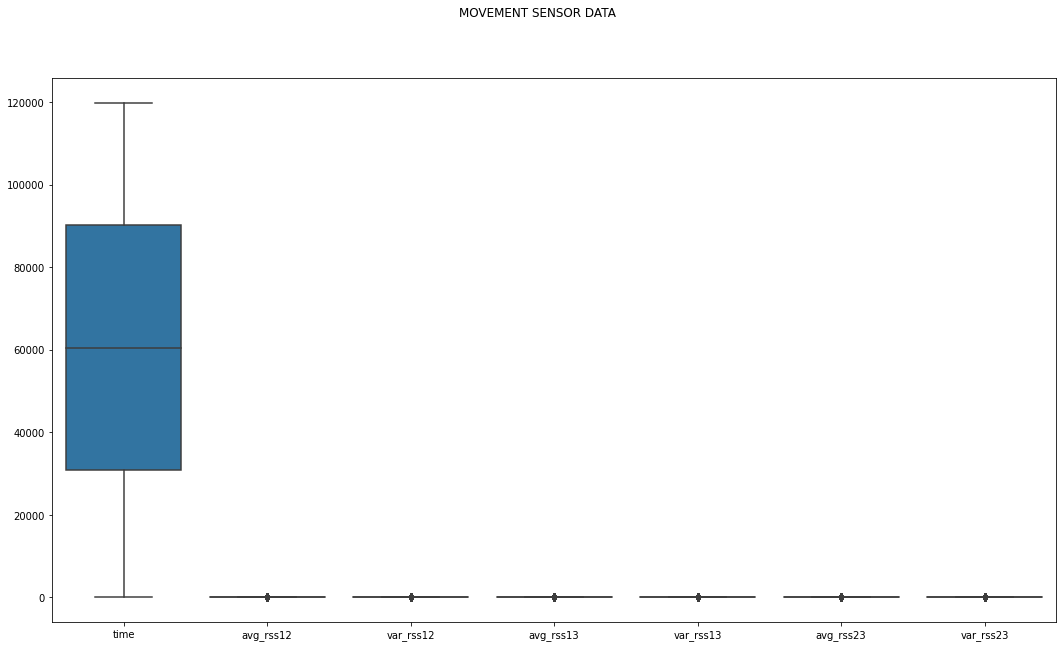

In [314]:
fig, ax = plt.subplots( figsize=(18, 10))

fig.suptitle('MOVEMENT SENSOR DATA')

sns.boxplot( data=new_df, ax=ax);

In [315]:
ProfileReport(new_df,title="MOVEMENT SENSOR DATA PROFILE")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

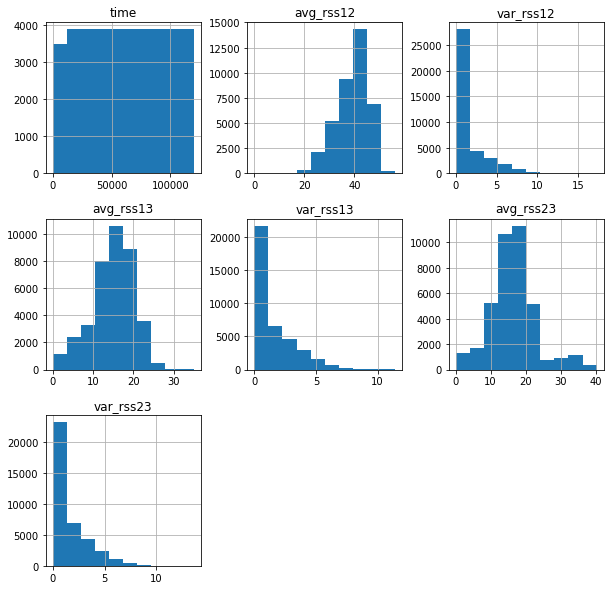

In [15]:
df.hist(figsize=(10,10));

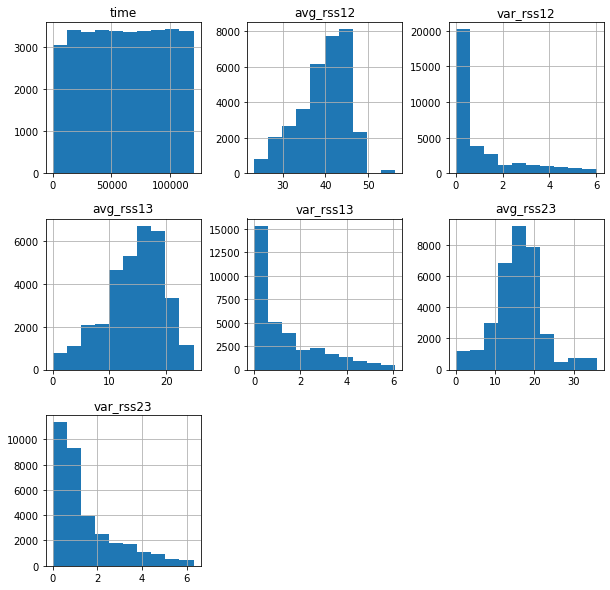

In [16]:
new_df.hist(figsize=(10,10));

#### spliting the dataset:

In [17]:
x=new_df.drop(['task'], axis=1)
y=new_df["task"]

In [316]:
x.shape,x.ndim

((33655, 7), 2)

In [317]:
y.shape,y.ndim

((33655,), 1)

###### Normalizing the data:

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as: z = (x - u) / s

In [318]:
scaler = StandardScaler()
scaler_x=scaler.fit_transform(x)
scaler_x

array([[ 1.43513192, -0.30927637,  1.70085425, ...,  0.39957961,
        -0.97480544,  1.94761014],
       [-0.247968  , -1.46216679,  1.8754389 , ...,  0.10717507,
        -0.1995584 ,  1.60330055],
       [-1.36274847,  1.31331016, -0.48494558, ..., -0.33143173,
         0.20846635, -0.45538388],
       ...,
       [ 1.06353843, -0.56547424,  1.93828938, ...,  0.80337635,
        -0.44437326,  0.2332353 ],
       [ 1.31855357,  0.80091441, -0.48494558, ..., -0.08776129,
         1.22852824, -0.69209672],
       [ 1.48613495, -2.40155899, -0.43606188, ..., -0.93712684,
         0.86130596, -0.74230853]])

###### plot for naormalise data: with_mean=true

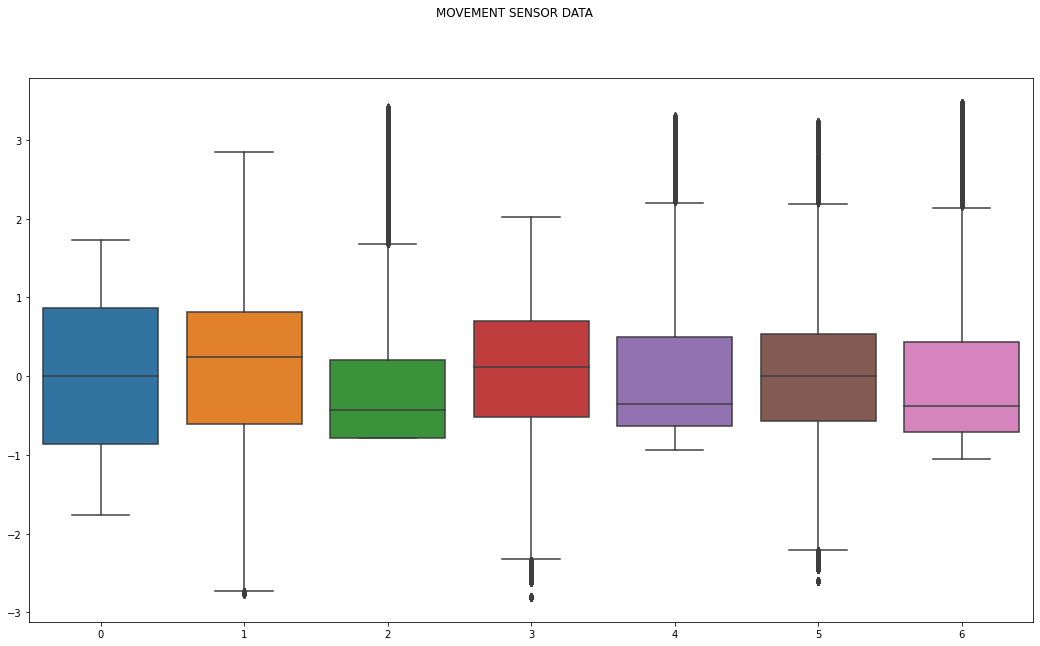

In [319]:
fig, ax = plt.subplots( figsize=(18, 10))

fig.suptitle('MOVEMENT SENSOR DATA')

sns.boxplot( data=scaler_x, ax=ax);

### Note:
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=1 / (1-R^2) ie reciprocal of tolerance level.

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

In [320]:
def vif_score(scaler_x,x):
    vif_score=[]
    
    for i in range(scaler_x.shape[1]):
        z=[x.columns[i],variance_inflation_factor(scaler_x,i)]
        vif_score.append(z)
        vif_frame=pd.DataFrame(vif_score,columns=["features","vif_score"])
    return vif_frame

In [321]:
vif_score(scaler_x,x)

features  vif_score
0       time   1.000308
1  avg_rss12   1.201078
2  var_rss12   1.913246
3  avg_rss13   1.233908
4  var_rss13   1.803413
5  avg_rss23   1.211998
6  var_rss23   1.811582

###### let's split the data for traing and teseting

In [322]:
x_train,x_test,y_train,y_test=train_test_split(scaler_x,y,test_size=0.10)

In [323]:
# lets check shape and split ratio:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((30289, 7), (30289,), (3366, 7), (3366,))

#### we are good to go for model :LogisticRegression(), let's explore.............

In [324]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

#### METHODS:
predict(X): Predict class labels for samples in X.

predict_log_proba(X): Predict logarithm of probability estimates.

predict_proba(X): Probability estimates.

In [325]:
log_reg.predict([x_test[0]])

array(['sitting'], dtype=object)

In [326]:
y_preds=[]
y_pred_prob=[]
y_pred_prob_max=[]
for i in range(len(x_test)):
    
    preds=log_reg.predict(x_test)
    y_preds.append(preds[i])
    
    y_pred_probs = log_reg.predict_proba(x_test)
    y_pred_prob.append(y_pred_probs[i])
    
    
    y_pred_prob_arg_max = log_reg.predict_proba(x_test)
    y_pred_prob_max.append(np.argmax(y_pred_prob_arg_max[i]))

In [327]:
## how correct our prediction are:
pred_df = pd.DataFrame({
                        "y_true":y_test,
                        "y_pred":y_preds,
                        "y_pred_probability_argmax":y_pred_prob_max
                              })
                        
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df[:]

y_true    y_pred  y_pred_probability_argmax  pred_correct
28963  standing   sitting                          4         False
32470  standing  standing                          5          True
23377   sitting   sitting                          4          True
25628   sitting     lying                          3         False
29521  standing  standing                          5          True
...         ...       ...                        ...           ...
23783   sitting   sitting                          4          True
23468   sitting     lying                          3         False
29680  standing  standing                          5          True
34052  standing   sitting                          4         False
9283    cycling   cycling                          2          True

[3366 rows x 4 columns]

In [328]:
## prediction wher label predcted are wrongs:
pred_df[pred_df['pred_correct']==False]

y_true    y_pred  y_pred_probability_argmax  pred_correct
28963  standing   sitting                          4         False
25628   sitting     lying                          3         False
13592     lying  bending2                          1         False
29240  standing   sitting                          4         False
37309   walking   cycling                          2         False
...         ...       ...                        ...           ...
24876   sitting  standing                          5         False
14500     lying  standing                          5         False
22870   sitting  bending2                          1         False
23468   sitting     lying                          3         False
34052  standing   sitting                          4         False

[1192 rows x 4 columns]

In [329]:
# prediction probability sample:
log_reg.predict_proba([x_test[10]])

array([[9.92981005e-01, 1.00585849e-03, 2.40698473e-03, 2.31854981e-05,
        2.95051960e-03, 4.38614372e-04, 1.93832677e-04]])

In [330]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pd.DataFrame(y_pred_prob),multi_class='ovr')

0.9272393267624162

### other perameter for logical regression:
###### penalty and solver which we can twick.

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

In [331]:
log_reg_1=LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000, multi_class='auto', verbose=1)


In [332]:
log_reg_1.fit(x_train,y_train)

[LibLinear]

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', verbose=1)

In [333]:
y_preds1=[]
y_pred_prob1=[]
y_pred_prob_max1=[]
for i in range(len(x_test)):
    
    preds=log_reg_1.predict(x_test)
    y_preds1.append(preds[i])
    
    y_pred_probs = log_reg_1.predict_proba(x_test)
    y_pred_prob1.append(y_pred_probs[i])
    
    
    y_pred_prob_arg_max = log_reg_1.predict_proba(x_test)
    y_pred_prob_max1.append(np.argmax(y_pred_prob_arg_max[i]))

In [334]:
## how correct our prediction are:
pred_df = pd.DataFrame({
                        "y_true":y_test,
                        "y_pred":y_preds1,
                        #"y_pred_probability_argmax":y_pred_prob_max1
                              })
                        
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df[:]

y_true    y_pred  pred_correct
28963  standing   sitting         False
32470  standing   sitting         False
23377   sitting   sitting          True
25628   sitting     lying         False
29521  standing  standing          True
...         ...       ...           ...
23783   sitting   sitting          True
23468   sitting     lying         False
29680  standing  standing          True
34052  standing   sitting         False
9283    cycling   walking         False

[3366 rows x 3 columns]

In [335]:
## prediction wher label predcted are wrongs:
pred_df[pred_df['pred_correct']==False]

y_true    y_pred  pred_correct
28963  standing   sitting         False
32470  standing   sitting         False
25628   sitting     lying         False
27096   sitting  bending1         False
13592     lying  bending2         False
...         ...       ...           ...
14500     lying  standing         False
22870   sitting  bending2         False
23468   sitting     lying         False
34052  standing   sitting         False
9283    cycling   walking         False

[1224 rows x 3 columns]

###### model predict more wrong value even if  max iter=1000 and penalties are l1/l2 . liblinear is not a good choice for multiclass dataset.

###### Let's try newton-cg with l2

In [336]:
log_reg_cg=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=1000, multi_class='auto', verbose=1)
log_reg_cg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=1000, solver='newton-cg', verbose=1)

In [347]:
preds=log_reg_cg.predict(x_test)
preds

array(['sitting', 'standing', 'sitting', ..., 'standing', 'sitting',
       'cycling'], dtype=object)

In [337]:
y_preds2=[]
y_pred_prob2=[]

for i in range(len(x_test)):
    
    preds=log_reg_cg.predict(x_test)
    y_preds2.append(preds[i])
    
    y_pred_probs = log_reg_cg.predict_proba([x_test[i]])
    y_pred_prob2.append(y_pred_probs)
    
    

In [338]:
## how correct our prediction are:
pred_df = pd.DataFrame({
                        "y_true":y_test,
                        "y_pred":y_preds2,
                        
                              })
                        
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df[:]

y_true    y_pred  pred_correct
28963  standing   sitting         False
32470  standing  standing          True
23377   sitting   sitting          True
25628   sitting     lying         False
29521  standing  standing          True
...         ...       ...           ...
23783   sitting   sitting          True
23468   sitting     lying         False
29680  standing  standing          True
34052  standing   sitting         False
9283    cycling   cycling          True

[3366 rows x 3 columns]

In [339]:
## prediction wher label predcted are wrongs:
pred_df[pred_df['pred_correct']==False]

y_true    y_pred  pred_correct
28963  standing   sitting         False
25628   sitting     lying         False
13592     lying  bending2         False
29240  standing   sitting         False
37309   walking   cycling         False
...         ...       ...           ...
24876   sitting  standing         False
14500     lying  standing         False
22870   sitting  bending2         False
23468   sitting     lying         False
34052  standing   sitting         False

[1192 rows x 3 columns]

#####  result are same as default lbfgs

In [340]:
score=log_reg_cg.score(x_test,y_test)
print(f"Model score on test set: {(score*100):.2f}%")

Model score on test set: 64.59%


##### so let's prepare  the confusion matric and then roc curve:



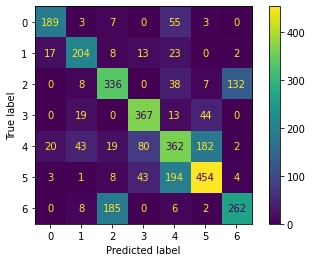

In [341]:
cm=confusion_matrix(y_test, y_preds2)
cm_display = ConfusionMatrixDisplay(cm).plot()

D:\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


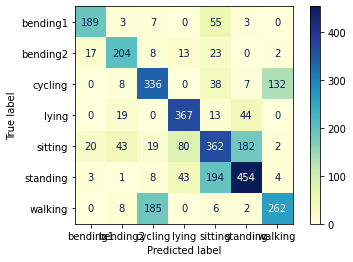

In [342]:
## detail report:
plot_confusion_matrix(log_reg_cg, x_test, pd.DataFrame(y_test),cmap='YlGnBu');


##### Classification Report:
>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

>The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

>The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

>The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

>The support is the number of occurrences of each class in y_true.

In [343]:
report=sklearn.metrics.classification_report(y_test, pd.DataFrame(y_preds2))
print(report)

              precision    recall  f1-score   support

    bending1       0.83      0.74      0.78       257
    bending2       0.71      0.76      0.74       267
     cycling       0.60      0.64      0.62       521
       lying       0.73      0.83      0.78       443
     sitting       0.52      0.51      0.52       708
    standing       0.66      0.64      0.65       707
     walking       0.65      0.57      0.61       463

    accuracy                           0.65      3366
   macro avg       0.67      0.67      0.67      3366
weighted avg       0.65      0.65      0.64      3366



In [344]:
 ## roc auc score:
from sklearn.metrics import roc_auc_score
roc_score=roc_auc_score(y_test,log_reg_cg.predict_proba(x_test), multi_class='ovr')
print(f"Model score on test set: {(roc_score*100):.2f}%")

Model score on test set: 92.72%


In [345]:
### roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg_cg.predict_proba(x_test),multi_class='ovr')


0.9272409495233255

##### Note:
There is 93.09 or 0.9 chance model would be able to segregate them or rank order them correctly i.e positive point has a higher prediction probability than the negative class. 

##### conclusion: for dataset using Logistoc Regression : model is confused mainly between "standing","walking","laying"
> still able to predict 65% data with accuracy.
>

##### saving file :

In [349]:
file="logical_reg_test.sav"
pickle.dump(log_reg_cg,open(file,'wb'))

# Calling and testing the model:

In [350]:
with open(file, 'rb') as handle:
    b = pickle.load(handle)

In [496]:
##random data test
z=[109750,37.75,3.56,15.75,1.92,10.00,4.18]
zz=[56500,27.75,4.44,105.25,3.56,16.50,2.69]
aa=[10,0,3,0,5,7,8]

In [497]:
b.predict([z])

array(['bending1'], dtype=object)

In [498]:
b.predict([zz])

array(['bending1'], dtype=object)

In [499]:
b.predict([aa])

array(['cycling'], dtype=object)